### import modules 

In [1]:
# import modules of interest 
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import mnist
import pylab
import copy
from decimal import *

sns.set()

# setup jupyter notebook 
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### define functions for code

In [2]:

# data loading function
def load_dataset():
    mndata = mnist.MNIST('./python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    
    labels_train = labels_train.astype('int')
    labels_test = labels_test.astype('int')
    return X_train, X_test,labels_train,labels_test

# extract the 2's and 7's, conver to -1 and 1 values 
def convert_2_7(x_train,x_test,labels_train,labels_test):
    #import pdb; pdb.set_trace()
    mask_train = np.logical_or(labels_train==2,labels_train==7)
    mask_test = np.logical_or(labels_test==2,labels_test==7)
   # mask_train = labels_train==2 or labels_train==7
    #mask_test = labels_test==2 or labels_test==7
    
    x_train_c = x_train[mask_train]
    x_test_c = x_test[mask_test]
    

    labels_train_c = labels_train[mask_train]
    labels_test_c = labels_test[mask_test]
    
    labels_train_c[labels_train_c==2] = -1
    labels_train_c[labels_train_c==7] = 1

    labels_test_c[labels_test_c==2] = -1
    labels_test_c[labels_test_c==7] = 1

    return x_train_c,x_test_c,labels_train_c,labels_test_c 

# implement the gradient method 
def gradient_method(X,y,X_test,y_test,lambda_val):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 0
    #step_size = 1e-3
    #step_size = 3e-2
    step_size = 1e-1
    criteria_conv = 0.000004

    
    # do one run through first after being initialized to zero 
    w = np.zeros((np.shape(X)[1],))
    b = 0

    n = np.shape(X)[0]
    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    
    cost_mu = 1+np.exp(-y*(b+np.dot(X,w))) 
    
    # calculate cost function on training
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)

    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classification
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = copy.copy(w)
    b_old = copy.copy(b)
    
    while not_conv:
        ##### training part 
        #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        mu_vec = 1/(1+np.exp(-y.T*(b+np.dot(X,w)))) 

        #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
        #g_b = (1/n)*np.sum(mu_vec-y)

        g_w = (1/n)*(np.dot(X.T,(-y*(1-mu_vec)))) + 2*lambda_val*w
        g_b = (1/n)*np.sum(-y*(1-mu_vec))

        # 
        w = w_old - step_size*g_w
        b = b_old - step_size*g_b

        w_vec.append(w)
        b_vec.append(b)
        
        cost_mu = 1+np.exp(-y*(b+np.dot(X,w)))
        j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
        ####### testing part

        mu_vec = 1/(1+np.exp(-y_test*(b+np.dot(X_test,w)))) 
        cost_mu = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

        j_test = (1/n_test)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)

        k_vec.append(k)
        j_train_vec.append(j_train)
        j_test_vec.append(j_test)

        #### classification
        train_signed = (b+np.dot(X,w))
        test_signed = (b+np.dot(X_test,w))

        train_data_class = np.sign(train_signed)
        test_data_class = np.sign(test_signed)

        train_classify_error_vec = [train_data_class != y]
        test_classify_error_vec = [test_data_class != y_test]

        train_classify_error = np.sum(train_classify_error_vec)/n
        test_classify_error = np.sum(test_classify_error_vec)/n_test

        train_classify_vec.append(train_classify_error)
        test_classify_vec.append(test_classify_error)
        
        delta_w = np.abs(w-w_old)
        delta_b = np.abs(b-b_old)
        
        #w = np.array(w)
        w_old = copy.copy(w)
        b_old = copy.copy(b)

        # check convergence
        if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
            not_conv = False

        else:
            not_conv = True
            k += 1

        print('the value of j train is {}'.format(j_train))

    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec

# implement stochastic gradient descent, batch_size determines how many examples are in each run. 
def SGD_old(X,y,X_test,y_test,lambda_val,batch_size):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 0
    #step_size = 1e-3
    step_size = 5e-2
    criteria_conv = 0.004

    w = np.zeros((np.shape(X)[1],))
    b = 0
    
    ##### gradient descent batch size choice
    batch_range = np.arange(np.shape(X)[0])
    
    n = np.shape(X)[0]
    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    
    cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))     
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)


    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = copy.copy(w)
    b_old = copy.copy(b)

    while not_conv:
        # stochastic choice
        np.random.shuffle(batch_range)

        inds_choose = np.random.choice(batch_range,size=batch_size,replace=False)
        X_sub = X[inds_choose,:]
        y_sub = y[inds_choose]
        ##### training part 
        #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        mu_vec = 1/(1+np.exp(-y_sub.T*(b+np.dot(X_sub,w)))) 

        #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
        #g_b = (1/n)*np.sum(mu_vec-y)

        #g_w = (1/batch_size)*(np.dot(X_sub.T,(-y_sub*(1-mu_vec)))) + 2*lambda_val*w
        g_w = (1/batch_size)*(np.dot(X_sub.T,(-y_sub*(1-mu_vec)))) + 2*(batch_size/n)*lambda_val*w
        g_b = (1/batch_size)*np.sum(-y_sub*(1-mu_vec))

        # 
        w = w_old - step_size*g_w
        b = b_old - step_size*g_b

        cost_mu = 1+np.exp(-y_sub.T*(b+np.dot(X_sub,w)))
        j_train = (1/batch_size)*(np.sum(np.log(cost_mu))) + 2*(batch_size/n)*lambda_val*np.dot(w.T,w)
        print('the value of j train is {}'.format(j_train))

        ####### testing part

        cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

        j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

        w_vec.append(copy.copy(w))
        b_vec.append(b)

        k_vec.append(k)
        j_train_vec.append(j_train)
        j_test_vec.append(j_test)

        #### classification
        train_signed = (b+np.dot(X,w))
        test_signed = (b+np.dot(X_test,w))

        train_data_class = np.sign(train_signed)
        test_data_class = np.sign(test_signed)

        train_classify_error_vec = [train_data_class != y]
        test_classify_error_vec = [test_data_class != y_test]

        train_classify_error = np.sum(train_classify_error_vec)/n
        test_classify_error = np.sum(test_classify_error_vec)/n_test

        train_classify_vec.append(train_classify_error)
        test_classify_vec.append(test_classify_error)

        delta_w = np.abs(w-w_old)
        delta_b = np.abs(b-b_old)

        #w = np.array(w)
        w_old = copy.copy(w)
        b_old = copy.copy(b)
        # check convergence
       # if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
        #if k>200:
        if k>1000:    
            not_conv = False

        else:
            not_conv = True
            k += 1
            
    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec


# implement newton's method 

def newton_method(X,y,X_test,y_test,lambda_val):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 1
    #step_size = 1e-3
    step_size = 1
    criteria_conv = 0.004

    w = np.zeros((np.shape(X)[1],))
    b = 0

    n = np.shape(X)[0]
    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    #mu_vec = np.zeros((np.shape(X)[0],))
    #cost_mu = np.zeros((np.shape(X)[0],))
    #range_vec = np.arange(len(mu_vec))

    cost_mu = 1+np.exp(-y*(b+np.dot(X,w)))     
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)


    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = copy.copy(w)
    b_old = copy.copy(b)

    while not_conv:
 
        ##### training part 
        #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        mu_vec = 1/(1+np.exp(-y*(b+np.dot(X,w))))
        #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
        #g_b = (1/n)*np.sum(mu_vec-y)

        g_w = (1/n)*(np.dot(X.T,(-y*(1-mu_vec)))) + 2*lambda_val*w
        g_b = (1/n)*np.sum(-y*(1-mu_vec))
        
        s_vec = mu_vec*(1-mu_vec)
        diag_sigmoid = np.diag(s_vec)
        identity_lambda = np.identity(np.shape(X)[1])
        h_w = (1/n)*np.dot(X.T,np.dot(diag_sigmoid,X)) + 2*lambda_val*identity_lambda
        h_b = np.sum((1/n)*s_vec)
        
        d_k_w = np.linalg.solve(h_w,-g_w)
        #d_k_b = np.linalg.solve(h_b,-g_b)
        d_k_b = -g_b/h_b

        # 
        w = w_old + step_size*d_k_w
        b = b_old + step_size*d_k_b
        
        cost_mu = 1+np.exp(-y*(b+np.dot(X,w)))     

        j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
        ####### testing part
        cost_mu_test = 1+np.exp(-y_test*(b+np.dot(X_test,w)))

        j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)
                             
        k_vec.append(k)
        j_train_vec.append(j_train)
        j_test_vec.append(j_test)

        
        ###       
        w_vec.append(w)
        b_vec.append(b)
        
        #### classification
        train_signed = (b+np.dot(X,w))
        test_signed = (b+np.dot(X_test,w))

        train_data_class = np.sign(train_signed)
        test_data_class = np.sign(test_signed)

        train_classify_error_vec = [train_data_class != y]
        test_classify_error_vec = [test_data_class != y_test]

        train_classify_error = np.sum(train_classify_error_vec)/n
        test_classify_error = np.sum(test_classify_error_vec)/n_test

        train_classify_vec.append(train_classify_error)
        test_classify_vec.append(test_classify_error)
        
        print('the value of j train is {}'.format(j_train))
        
        delta_w = np.abs(w-w_old)
        delta_b = np.abs(b-b_old)
        
        #w = np.array(w)
        w_old = copy.copy(w)
        b_old = copy.copy(b)
                                
        # check convergence
        if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
            not_conv = False

        else:
            not_conv = True
            k += 1

    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec


# plot the cost fucntion and misclassification error 
def plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,titl_1):
    
    # plot the cost function vs. iteration
    plt.figure(figsize=(4, 4), dpi=600)
    plt.plot(k_vec,j_train_vec,label='training')
    plt.plot(k_vec,j_test_vec,label='testing')
    plt.xlabel('iteration number')
    plt.ylabel('cost function')
    plt.title(titl_1 + 'Cost function vs. iteration')
    plt.legend()
    index = np.argmin(j_train_vec)
    k_best = k_vec[index]
    w_best = w_vec[index]
    titl_1_save = titl_1[:-2]
    titl_1_save = titl_1_save.replace(" ","_")
    #plt.savefig(titl_1_save + 'cost_func')

    # plot the misclassification error vs. iteration 
    plt.figure(figsize=(4, 4), dpi=600)
    plt.plot(k_vec,train_classify_vec,label='training data')
    plt.plot(k_vec,test_classify_vec,label='test data')
    plt.xlabel('iteration number')
    plt.ylabel('misclassification error')
    plt.title(titl_1 + 'Misclassification error vs. iteration number')
    plt.legend()
    #plt.savefig(titl_1_save + 'mis_class_error')


In [26]:
# implement stochastic gradient descent, batch_size determines how many examples are in each run. 
def SGD(X,y,X_test,y_test,lambda_val,batch_size):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 0
    step_size = 5e-3
    #step_size = 1e-3
    criteria_conv = 0.004

    w = np.zeros((np.shape(X)[1],))
    b = 0
    
    ##### gradient descent batch size choice
    batch_range = np.arange(np.shape(X)[0])
    
    n = np.float(np.shape(X)[0])
    batch_size= np.float(batch_size)
    lambda_val = np.float(lambda_val)
    lambda_val_scale = lambda_val*batch_size/n


    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    
    cost_mu = 1+np.exp(-y*(b+np.dot(X,w)))     
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)


    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = w[:]
    b_old = copy.copy(b)

    while not_conv:
        # stochastic choice
        np.random.shuffle(batch_range)
        for i in np.arange(n/batch_size): 
            inds_choose = batch_range[int(i*batch_size):(int(i*batch_size)+int(batch_size))]
            #inds_choose = np.random.choice(batch_range,size=batch_size,replace=False)
            X_sub = X[inds_choose,:]
            y_sub = y[inds_choose]
            ##### training part 
            #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
            #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
            mu_vec = 1/(1+np.exp(-y_sub*(b+np.dot(X_sub,w)))) 

            #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
            #g_b = (1/n)*np.sum(mu_vec-y)

            #g_w = (1/batch_size)*(np.dot(X_sub.T,(-y_sub*(1-mu_vec)))) + 2*lambda_val*w
            g_w = (1/batch_size)*(np.dot(X_sub.T,(-y_sub*(1-mu_vec))))+ (
                2*lambda_val*w_old)
            
            #g_w[np.abs(g_w)<1e-15] = 0
            
            g_b = (1/batch_size)*np.sum(-y_sub*(1-mu_vec))

            # 
            w = w_old - step_size*g_w
            b = b_old - step_size*g_b
            
            
            #w = np.array(w)
            w_old = w[:]
            b_old = copy.copy(b)
            
            delta_w = np.abs(w-w_old)
            delta_b = np.abs(b-b_old)

            cost_mu = 1+np.exp(-y*(b+np.dot(X,w)))
            j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
            print('the value of j train is {}'.format(j_train))

            ####### testing part

            cost_mu_test = 1+np.exp(-y_test*(b+np.dot(X_test,w)))

            j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

            w_vec.append(w[:])
            b_vec.append(b)

            k_vec.append(k)
            j_train_vec.append(j_train)
            j_test_vec.append(j_test)

            #### classification
            train_signed = (b+np.dot(X,w))
            test_signed = (b+np.dot(X_test,w))

            train_data_class = np.sign(train_signed)
            test_data_class = np.sign(test_signed)

            train_classify_error_vec = [train_data_class != y]
            test_classify_error_vec = [test_data_class != y_test]

            train_classify_error = np.sum(train_classify_error_vec)/n
            test_classify_error = np.sum(test_classify_error_vec)/n_test

            train_classify_vec.append(train_classify_error)
            test_classify_vec.append(test_classify_error)
            #if k == 600:
            #    import pdb;pdb.set_trace()

            # check convergence
           # if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
            if k>1000:
            #if k>3000:    
                not_conv = False
                return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec


            else:
                not_conv = True
                k += 1

    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec



### Load and convert data 

In [10]:
x_train,x_test,labels_train,labels_test = load_dataset()

In [11]:
x_train_c,x_test_c,labels_train_c,labels_test_c  = convert_2_7(x_train,x_test,labels_train,labels_test)

In [24]:
lambda_val = 10**-1


### gradient descent method 

In [19]:
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = gradient_method(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val)

the value of j train is 0.6931471805599452
the value of j train is 0.5361818620309095
the value of j train is 0.43955495021152
the value of j train is 0.376174726887262
the value of j train is 0.3320176608013818
the value of j train is 0.29963276889969115
the value of j train is 0.2748830047347138
the value of j train is 0.25533748208693163
the value of j train is 0.23948934977825617
the value of j train is 0.22635990290594168
the value of j train is 0.2152876240327672
the value of j train is 0.2058099611927197
the value of j train is 0.19759397399903164
the value of j train is 0.19039396498434846
the value of j train is 0.18402465743288202
the value of j train is 0.17834367482567864
the value of j train is 0.17323977564298088
the value of j train is 0.16862475723451303
the value of j train is 0.1644277618519096
the value of j train is 0.16059119331677443
the value of j train is 0.15706773698533033
the value of j train is 0.15381815022691434
the value of j train is 0.15080960051683934


the value of j train is 0.07176265051047985
the value of j train is 0.07165401740491852
the value of j train is 0.07154619615270472
the value of j train is 0.07143917638607072
the value of j train is 0.0713329479255607
the value of j train is 0.0712275007756052
the value of j train is 0.07112282512022292
the value of j train is 0.07101891131884502
the value of j train is 0.0709157499022584
the value of j train is 0.0708133315686635
the value of j train is 0.07071164717984307
the value of j train is 0.07061068775743817
the value of j train is 0.07051044447932764
the value of j train is 0.07041090867610819
the value of j train is 0.07031207182767121
the value of j train is 0.07021392555987357
the value of j train is 0.07011646164129921
the value of j train is 0.07001967198010858
the value of j train is 0.06992354862097327
the value of j train is 0.0698280837420929
the value of j train is 0.06973326965229186
the value of j train is 0.06963909878819337
the value of j train is 0.06954556371

the value of j train is 0.05942093176229168
the value of j train is 0.059380209750752616
the value of j train is 0.05933964157569069
the value of j train is 0.05929922626342118
the value of j train is 0.05925896284896129
the value of j train is 0.059218850375929465
the value of j train is 0.059178887896445806
the value of j train is 0.05913907447103421
the value of j train is 0.059099409168525636
the value of j train is 0.05905989106596295
the value of j train is 0.05902051924850704
the value of j train is 0.05898129280934416
the value of j train is 0.05894221084959469
the value of j train is 0.05890327247822315
the value of j train is 0.05886447681194939
the value of j train is 0.058825822975161174
the value of j train is 0.05878731009982781
the value of j train is 0.058748937325415036
the value of j train is 0.05871070379880118
the value of j train is 0.058672608674194236
the value of j train is 0.058634651113050426
the value of j train is 0.05859683028399349
the value of j train is 

the value of j train is 0.05369349831975132
the value of j train is 0.05367079675809045
the value of j train is 0.053648153139030805
the value of j train is 0.05362556721627461
the value of j train is 0.05360303874499001
the value of j train is 0.053580567481799686
the value of j train is 0.053558153184769794
the value of j train is 0.05353579561339881
the value of j train is 0.053513494528606674
the value of j train is 0.053491249692723855
the value of j train is 0.05346906086948063
the value of j train is 0.05344692782399649
the value of j train is 0.05342485032276947
the value of j train is 0.053402828133665814
the value of j train is 0.05338086102590957
the value of j train is 0.05335894877007232
the value of j train is 0.05333709113806308
the value of j train is 0.05331528790311811
the value of j train is 0.0532935388397911
the value of j train is 0.053271843723943134
the value of j train is 0.053250202332733004
the value of j train is 0.05322861444460744
the value of j train is 0

the value of j train is 0.050248331527455045
the value of j train is 0.0502333412098215
the value of j train is 0.050218379892129184
the value of j train is 0.05020344748070534
the value of j train is 0.050188543882298105
the value of j train is 0.05017366900407411
the value of j train is 0.05015882275361604
the value of j train is 0.05014400503892025
the value of j train is 0.05012921576839436
the value of j train is 0.05011445485085493
the value of j train is 0.050099722195525054
the value of j train is 0.05008501771203207
the value of j train is 0.050070341310405206
the value of j train is 0.05005569290107335
the value of j train is 0.05004107239486265
the value of j train is 0.05002647970299437
the value of j train is 0.05001191473708253
the value of j train is 0.049997377409131766
the value of j train is 0.049982867631535
the value of j train is 0.049968385317071345
the value of j train is 0.04995393037890385
the value of j train is 0.049939502730577325
the value of j train is 0.0

the value of j train is 0.04787702379656086
the value of j train is 0.04786616663548681
the value of j train is 0.047855326360419545
the value of j train is 0.04784450292715316
the value of j train is 0.047833696291641976
the value of j train is 0.04782290640999983
the value of j train is 0.04781213323849931
the value of j train is 0.04780137673357098
the value of j train is 0.047790636851802716
the value of j train is 0.04777991354993891
the value of j train is 0.047769206784879815
the value of j train is 0.047758516513680765
the value of j train is 0.047747842693551486
the value of j train is 0.04773718528185539
the value of j train is 0.04772654423610886
the value of j train is 0.04771591951398051
the value of j train is 0.04770531107329058
the value of j train is 0.047694718872010135
the value of j train is 0.047684142868260414
the value of j train is 0.04767358302031214
the value of j train is 0.0476630392865849
the value of j train is 0.047652511625646314
the value of j train is 

the value of j train is 0.04610808551455756
the value of j train is 0.04609974788866755
the value of j train is 0.04609142106109446
the value of j train is 0.046083105008018994
the value of j train is 0.04607479970569432
the value of j train is 0.04606650513044591
the value of j train is 0.04605822125867122
the value of j train is 0.046049948066839354
the value of j train is 0.04604168553149085
the value of j train is 0.0460334336292374
the value of j train is 0.04602519233676153
the value of j train is 0.04601696163081636
the value of j train is 0.046008741488225355
the value of j train is 0.04600053188588196
the value of j train is 0.04599233280074946
the value of j train is 0.04598414420986056
the value of j train is 0.045975966090317275
the value of j train is 0.04596779841929053
the value of j train is 0.045959641174019995
the value of j train is 0.04595149433181374
the value of j train is 0.04594335787004803
the value of j train is 0.04593523176616702
the value of j train is 0.04

the value of j train is 0.0447210046851656
the value of j train is 0.04471433065783455
the value of j train is 0.04470766400209336
the value of j train is 0.04470100470387787
the value of j train is 0.04469435274916092
the value of j train is 0.044687708123952244
the value of j train is 0.04468107081429828
the value of j train is 0.04467444080628214
the value of j train is 0.04466781808602345
the value of j train is 0.04466120263967818
the value of j train is 0.044654594453438605
the value of j train is 0.04464799351353313
the value of j train is 0.04464139980622617
the value of j train is 0.04463481331781804
the value of j train is 0.04462823403464487
the value of j train is 0.04462166194307842
the value of j train is 0.04461509702952601
the value of j train is 0.04460853928043041
the value of j train is 0.044601988682269625
the value of j train is 0.04459544522155694
the value of j train is 0.044588908884840635
the value of j train is 0.044582379658704034
the value of j train is 0.04

the value of j train is 0.04358219805592053
the value of j train is 0.043576697557217214
the value of j train is 0.04357120232288363
the value of j train is 0.043565712344081
the value of j train is 0.043560227611990986
the value of j train is 0.043554748117815734
the value of j train is 0.04354927385277768
the value of j train is 0.0435438048081196
the value of j train is 0.04353834097510447
the value of j train is 0.04353288234501548
the value of j train is 0.04352742890915589
the value of j train is 0.043521980658849074
the value of j train is 0.04351653758543836
the value of j train is 0.04351109968028703
the value of j train is 0.04350566693477827
the value of j train is 0.04350023934031505
the value of j train is 0.04349481688832014
the value of j train is 0.043489399570235995
the value of j train is 0.04348398737752474
the value of j train is 0.043478580301668075
the value of j train is 0.04347317833416726
the value of j train is 0.043467781466543
the value of j train is 0.04346

the value of j train is 0.042641244588450485
the value of j train is 0.042636590222840935
the value of j train is 0.04263193977525888
the value of j train is 0.042627293239826974
the value of j train is 0.04262265061068006
the value of j train is 0.04261801188196512
the value of j train is 0.0426133770478413
the value of j train is 0.0426087461024798
the value of j train is 0.042604119040063886
the value of j train is 0.04259949585478889
the value of j train is 0.042594876540862116
the value of j train is 0.04259026109250285
the value of j train is 0.04258564950394229
the value of j train is 0.042581041769423573
the value of j train is 0.042576437883201666
the value of j train is 0.04257183783954345
the value of j train is 0.04256724163272754
the value of j train is 0.04256264925704439
the value of j train is 0.04255806070679617
the value of j train is 0.042553475976296794
the value of j train is 0.04254889505987184
the value of j train is 0.04254431795185858
the value of j train is 0.

the value of j train is 0.04182524057180115
the value of j train is 0.04182123431916374
the value of j train is 0.0418172310594102
the value of j train is 0.04181323078849359
the value of j train is 0.04180923350237459
the value of j train is 0.04180523919702143
the value of j train is 0.04180124786840989
the value of j train is 0.04179725951252333
the value of j train is 0.0417932741253526
the value of j train is 0.04178929170289605
the value of j train is 0.041785312241159535
the value of j train is 0.041781335736156375
the value of j train is 0.041777362183907325
the value of j train is 0.041773391580440584
the value of j train is 0.041769423921791775
the value of j train is 0.0417654592040039
the value of j train is 0.04176149742312736
the value of j train is 0.04175753857521991
the value of j train is 0.041753582656346634
the value of j train is 0.04174962966257996
the value of j train is 0.04174567958999965
the value of j train is 0.0417417324346927
the value of j train is 0.0417

the value of j train is 0.04112763706476559
the value of j train is 0.04112412508527391
the value of j train is 0.04112061545976425
the value of j train is 0.04111710818533885
the value of j train is 0.04111360325910496
the value of j train is 0.04111010067817479
the value of j train is 0.04110660043966548
the value of j train is 0.04110310254069912
the value of j train is 0.041099606978402745
the value of j train is 0.04109611374990829
the value of j train is 0.0410926228523526
the value of j train is 0.041089134282877436
the value of j train is 0.0410856480386294
the value of j train is 0.04108216411676005
the value of j train is 0.04107868251442573
the value of j train is 0.04107520322878767
the value of j train is 0.04107172625701197
the value of j train is 0.04106825159626953
the value of j train is 0.04106477924373609
the value of j train is 0.041061309196592184
the value of j train is 0.041057841452023194
the value of j train is 0.04105437600721924
the value of j train is 0.0410

the value of j train is 0.04049960825476939
the value of j train is 0.04049649658063099
the value of j train is 0.040493386788371895
the value of j train is 0.04049027887587306
the value of j train is 0.040487172841018784
the value of j train is 0.04048406868169668
the value of j train is 0.04048096639579778
the value of j train is 0.040477865981216325
the value of j train is 0.04047476743584995
the value of j train is 0.04047167075759958
the value of j train is 0.04046857594436945
the value of j train is 0.0404654829940671
the value of j train is 0.04046239190460333
the value of j train is 0.04045930267389227
the value of j train is 0.04045621529985129
the value of j train is 0.04045312978040107
the value of j train is 0.04045004611346552
the value of j train is 0.040446964296971824
the value of j train is 0.040443884328850446
the value of j train is 0.04044080620703504
the value of j train is 0.04043772992946254
the value of j train is 0.04043465549407312
the value of j train is 0.04

KeyboardInterrupt: 

In [ ]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Gradient Descent - \n')

### stochastic gradient descent - 1 example

In [27]:
batch_size = 1
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = SGD(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val,batch_size)

the value of j train is 0.6931471805599452
the value of j train is 0.6881528000536391
the value of j train is 0.6731414295308066
the value of j train is 0.6663816553511895
the value of j train is 0.6554410307805921
the value of j train is 0.6456828060530921
the value of j train is 0.6361543759102304
the value of j train is 0.627822776811276
the value of j train is 0.6288336761509947
the value of j train is 0.619707166678071
the value of j train is 0.6181708067606234
the value of j train is 0.6171926332601017
the value of j train is 0.6041503842842656
the value of j train is 0.6012616391048116
the value of j train is 0.5977900238771128
the value of j train is 0.5976108211605851
the value of j train is 0.5961735154077142
the value of j train is 0.5973004407936839
the value of j train is 0.6034614710075109
the value of j train is 0.5889360786378195
the value of j train is 0.5656261792736674
the value of j train is 0.548712868341974
the value of j train is 0.5463286884301913
the value of j

the value of j train is 0.2779010183529479
the value of j train is 0.2773080612751642
the value of j train is 0.2785656911981976
the value of j train is 0.27789095303362576
the value of j train is 0.2808485854849255
the value of j train is 0.28125525653550293
the value of j train is 0.28217809519586995
the value of j train is 0.27972149581280825
the value of j train is 0.2802041832948409
the value of j train is 0.27683297482000946
the value of j train is 0.2771020546985534
the value of j train is 0.27734614424228504
the value of j train is 0.2764911881324955
the value of j train is 0.276833745516915
the value of j train is 0.2765569574988291
the value of j train is 0.27481952891366973
the value of j train is 0.2739783232723194
the value of j train is 0.27305561057839783
the value of j train is 0.27308626742073544
the value of j train is 0.2719898019369755
the value of j train is 0.27180462496779767
the value of j train is 0.2717126124929644
the value of j train is 0.27104050501754007
t

the value of j train is 0.25046825255346783
the value of j train is 0.25070038591347776
the value of j train is 0.24994752017974706
the value of j train is 0.24964185966493352
the value of j train is 0.24897648986049853
the value of j train is 0.24857204474237246
the value of j train is 0.24952042974478905
the value of j train is 0.2498151586055518
the value of j train is 0.24812168661161932
the value of j train is 0.2503381161762771
the value of j train is 0.2478454358364067
the value of j train is 0.24910545268930107
the value of j train is 0.24965679952791275
the value of j train is 0.24942302110822684
the value of j train is 0.2485863578288256
the value of j train is 0.2457618461583983
the value of j train is 0.24527987104298896
the value of j train is 0.24524181386008273
the value of j train is 0.24601683516002637
the value of j train is 0.2461556400654546
the value of j train is 0.24630500545122663
the value of j train is 0.24668554584874258
the value of j train is 0.246838506424

KeyboardInterrupt: 

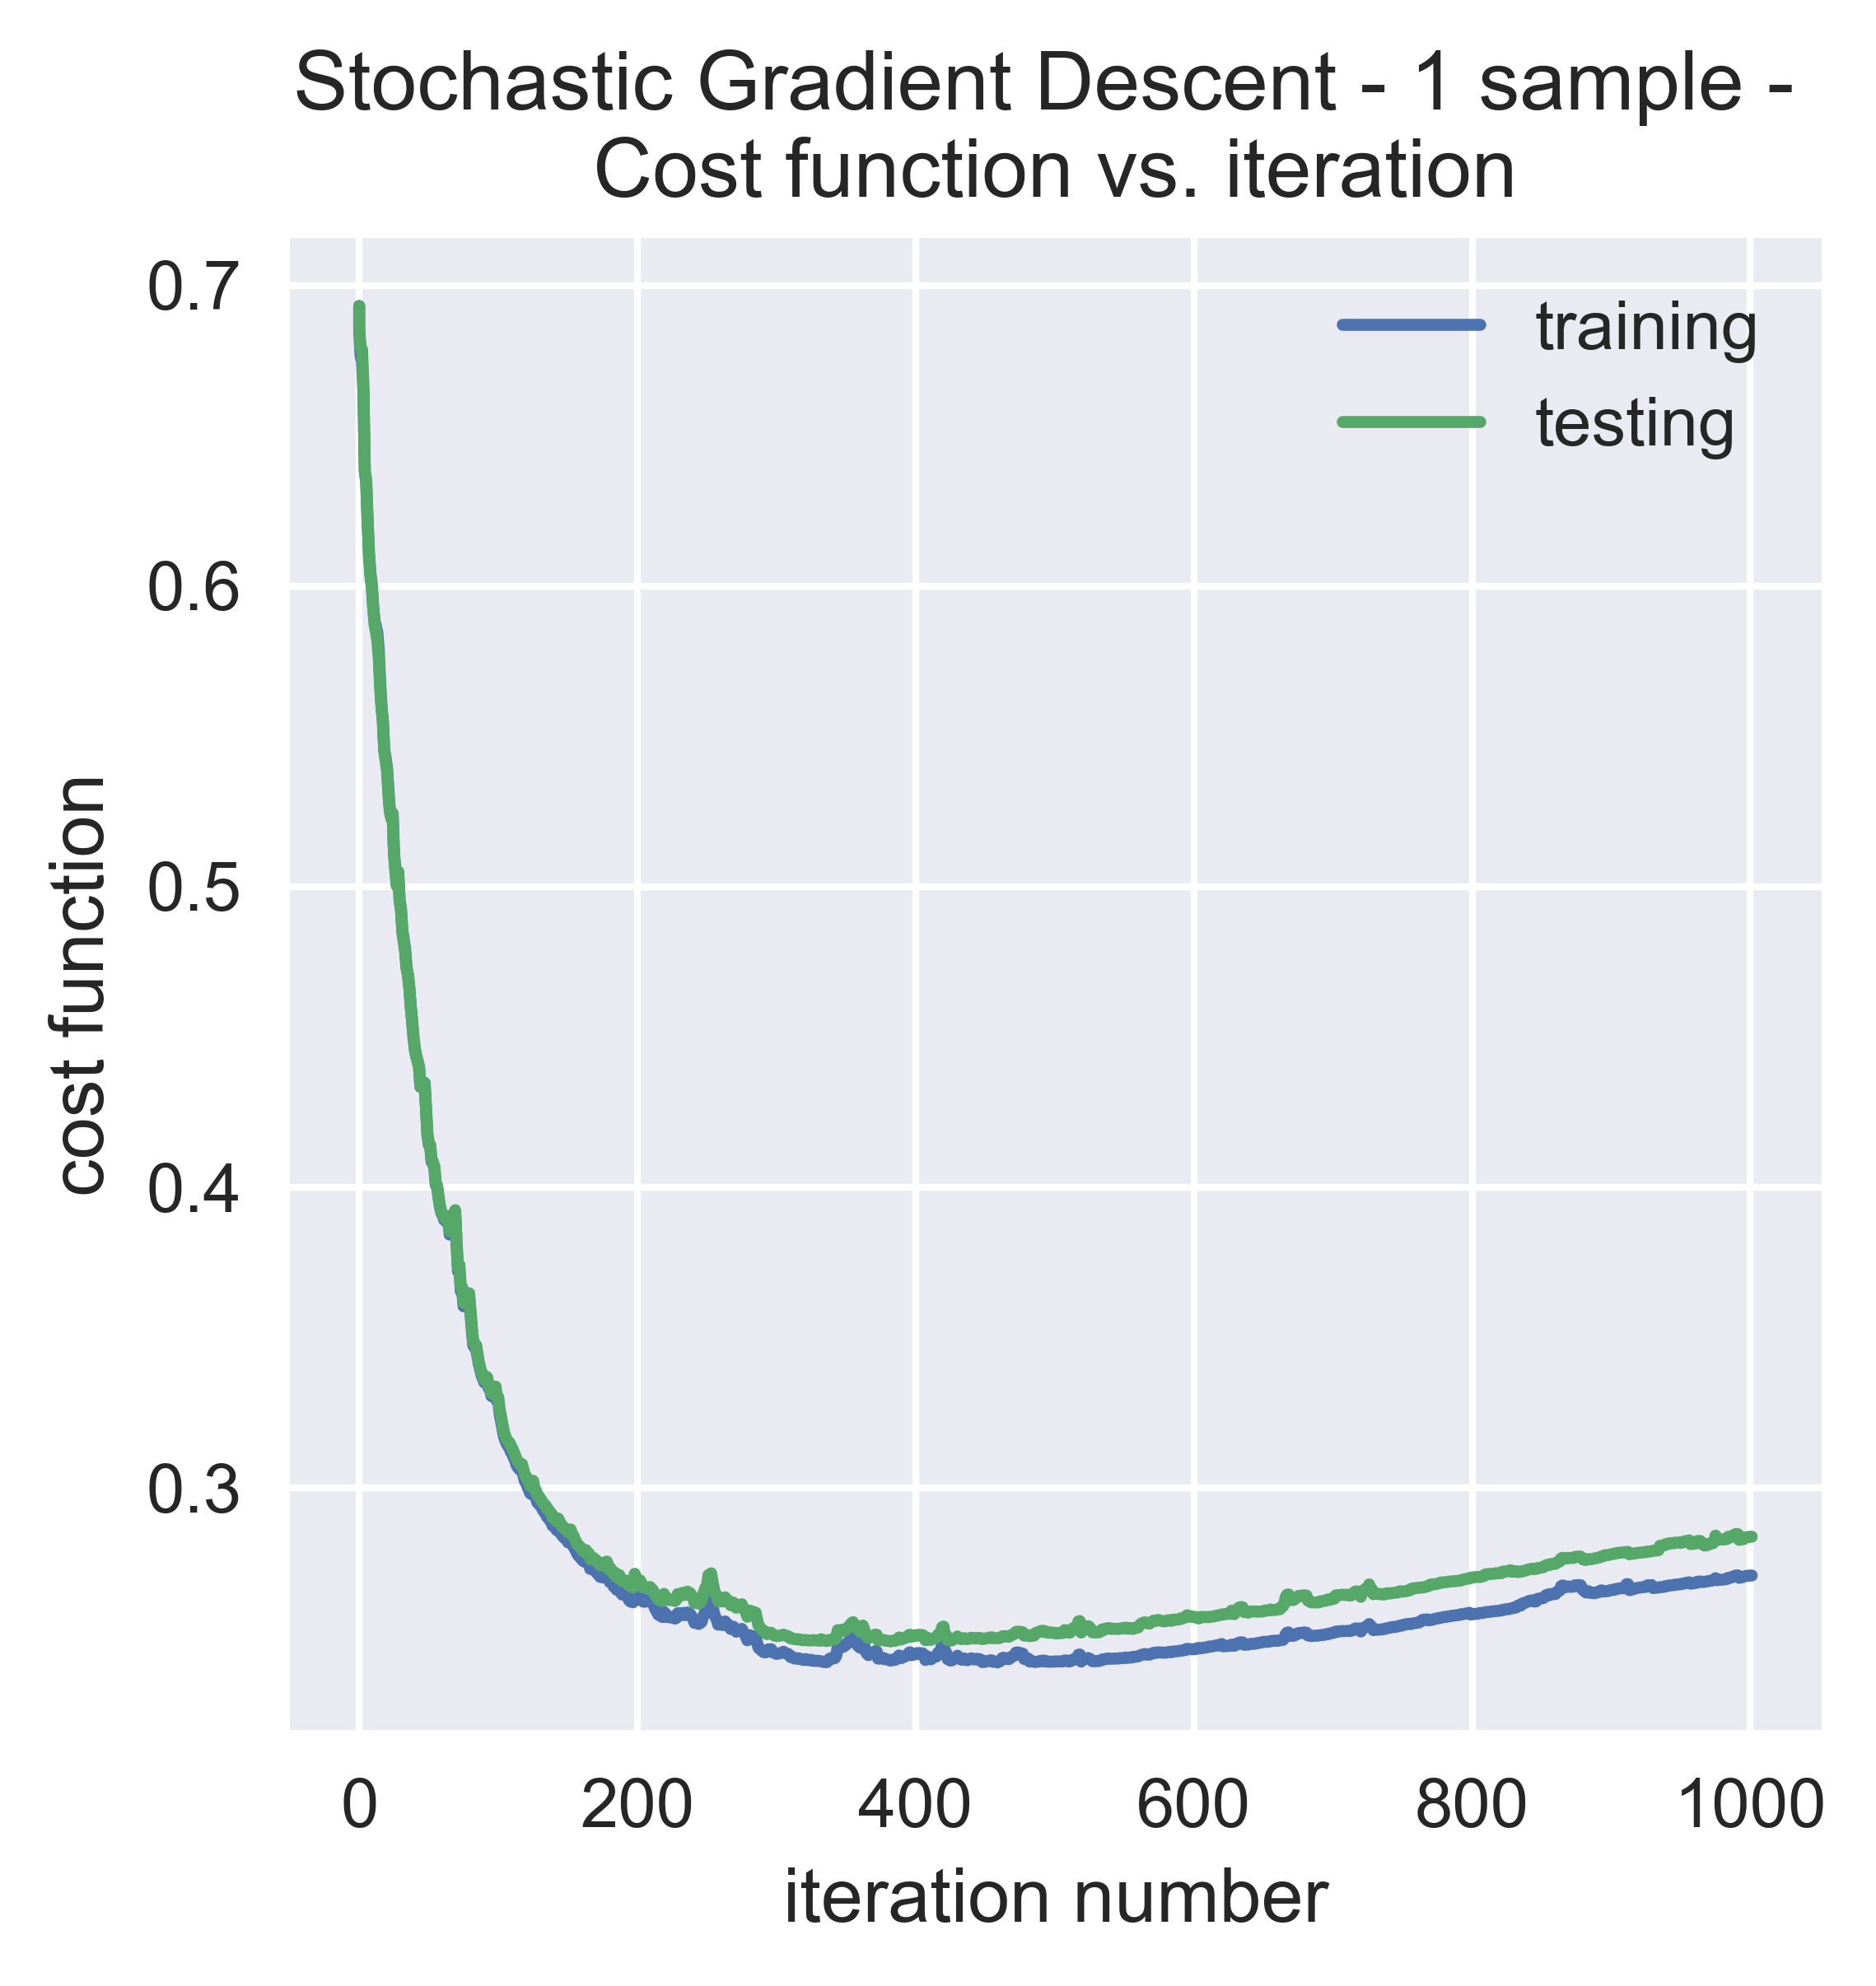

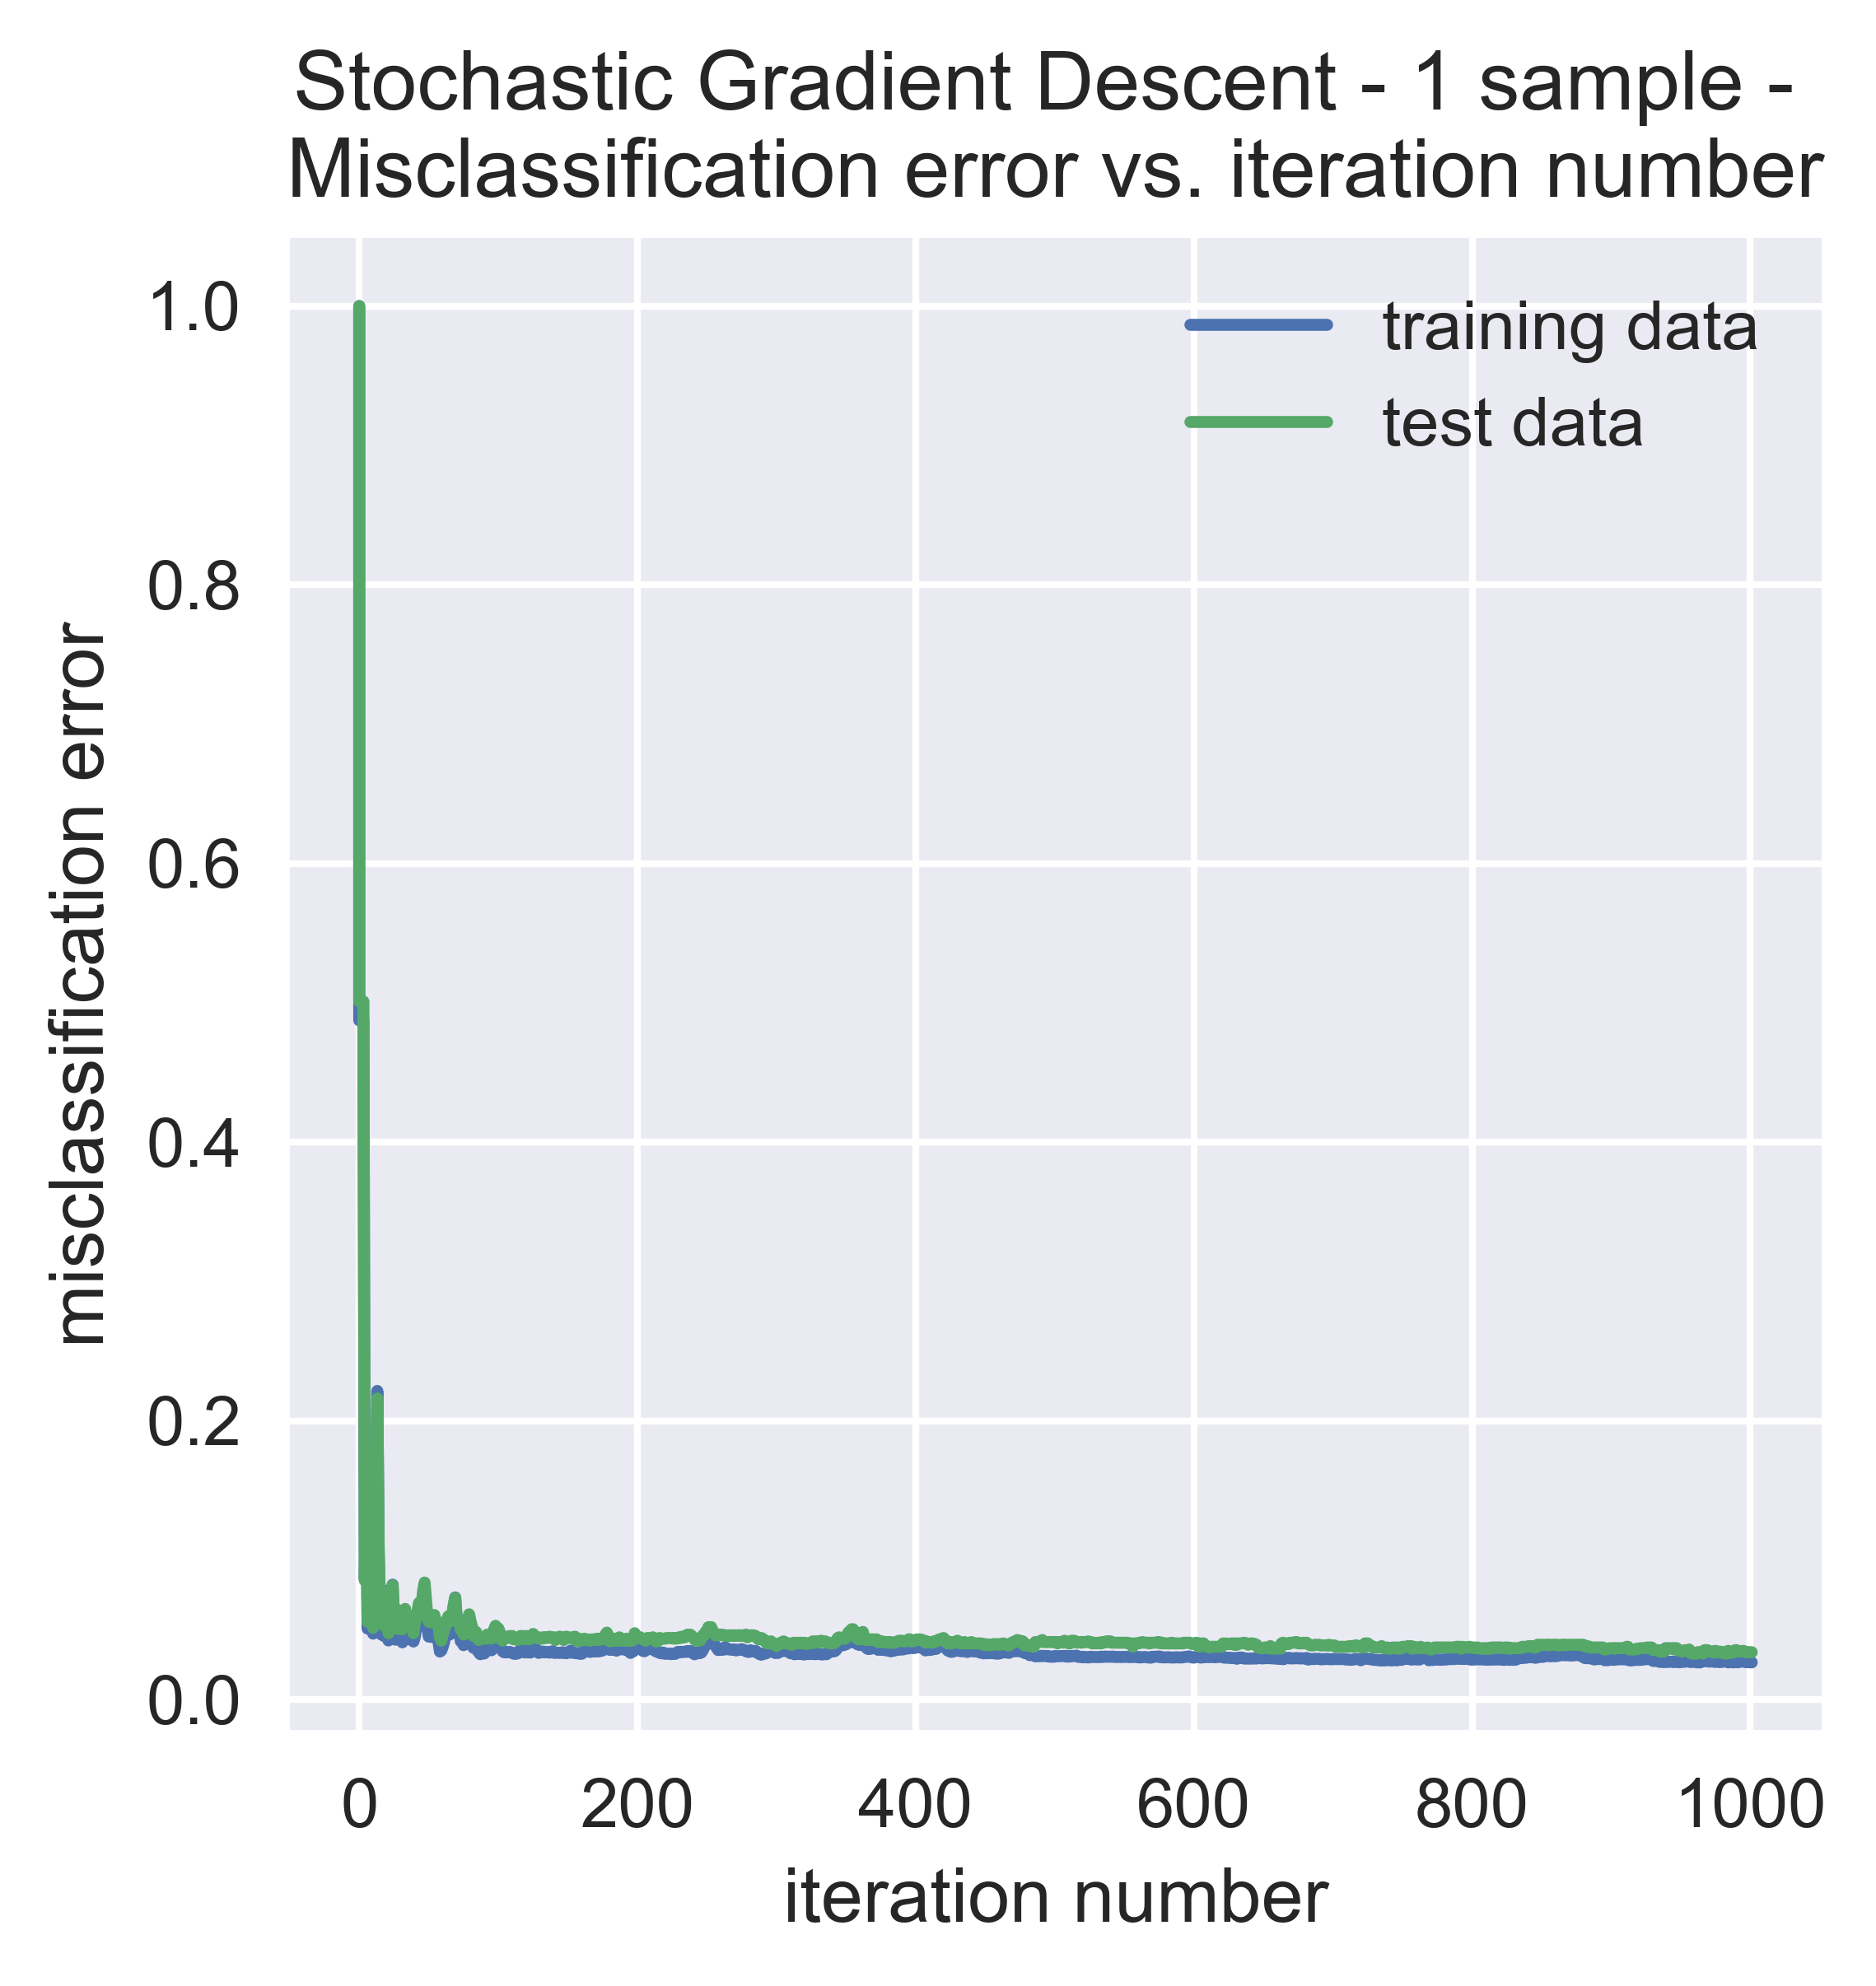

In [28]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Stochastic Gradient Descent - 1 sample - \n')

### stochastic gradient descent - batch size 100

In [72]:
batch_size = 100
#batch_size = 12223
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = SGD(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val,batch_size)

the value of j train is 0.6931471805599452
the value of j train is 0.6081975583564165
the value of j train is 0.5487600975442805
the value of j train is 0.49481493149647254
the value of j train is 0.4567255413870483
the value of j train is 0.42474695420084474
the value of j train is 0.39820807399587027
the value of j train is 0.3791978290636593
the value of j train is 0.3569286866941225
the value of j train is 0.3402950790423454
the value of j train is 0.32706369186502304
the value of j train is 0.3153949994827906
the value of j train is 0.30527319885673193
the value of j train is 0.2964623371384195
the value of j train is 0.2897953584885095
the value of j train is 0.2832803813705154
the value of j train is 0.27724684229863816
the value of j train is 0.2723326368532893
the value of j train is 0.2680561093922856
the value of j train is 0.2639938557442381
the value of j train is 0.2605642667625763
the value of j train is 0.2575824288119488
the value of j train is 0.2550313753831931
the v

the value of j train is 0.3294826266991363
the value of j train is 0.3301658120195353
the value of j train is 0.3304954439671874
the value of j train is 0.3305106063501022
the value of j train is 0.33127288991330117
the value of j train is 0.33201351442495913
the value of j train is 0.3326159265338945
the value of j train is 0.333369293378468
the value of j train is 0.33413622368059165
the value of j train is 0.3347009256581499
the value of j train is 0.335278225421234
the value of j train is 0.33596626490363757
the value of j train is 0.33651464221831545
the value of j train is 0.33738262529641183
the value of j train is 0.337684010150544
the value of j train is 0.33837915148055675
the value of j train is 0.3389459513593106
the value of j train is 0.3396191488179715
the value of j train is 0.3402674993953935
the value of j train is 0.3409119539471133
the value of j train is 0.34143458408470917
the value of j train is 0.3423378788943303
the value of j train is 0.3424342686923446
the va

the value of j train is 0.4360804034977831
the value of j train is 0.43643899063134345
the value of j train is 0.4365301248829705
the value of j train is 0.43684082578034544
the value of j train is 0.43696849337092747
the value of j train is 0.43715511977593147
the value of j train is 0.4377212438655308
the value of j train is 0.4382682710468798
the value of j train is 0.4386790533199847
the value of j train is 0.43829252829462356
the value of j train is 0.4388720239525048
the value of j train is 0.4392664334870018
the value of j train is 0.4397901754465222
the value of j train is 0.4402004285807881
the value of j train is 0.4405541954125604
the value of j train is 0.44111850607154746
the value of j train is 0.44138566133902657
the value of j train is 0.441929550205217
the value of j train is 0.4422766361363937
the value of j train is 0.4426275473613499
the value of j train is 0.44309866558753697
the value of j train is 0.44357681563653434
the value of j train is 0.44410545721704897
th

the value of j train is 0.5097991563553868
the value of j train is 0.510187420531482
the value of j train is 0.5107170492660549
the value of j train is 0.5111349228435794
the value of j train is 0.5116133749821274
the value of j train is 0.5119520256716701
the value of j train is 0.5121337732467056
the value of j train is 0.5124860513400806
the value of j train is 0.5129984328708029
the value of j train is 0.5133279009531354
the value of j train is 0.5136873753479925
the value of j train is 0.5139809255733292
the value of j train is 0.5139768294490727
the value of j train is 0.5143025254713237
the value of j train is 0.5148681863763085
the value of j train is 0.5153656605171936
the value of j train is 0.5156377312537885
the value of j train is 0.5160321317936103
the value of j train is 0.5164944071528418
the value of j train is 0.5165270809911097
the value of j train is 0.5165999675211703
the value of j train is 0.5169946523232111
the value of j train is 0.5175563427165306
the value of

KeyboardInterrupt: 

In [ ]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Stochastic Gradient Descent - 100 sample Batch - \n')

### newton's method 

In [18]:
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = newton_method(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val)

the value of j train is 0.6931471805599452
the value of j train is 0.27708419506447773
0.0134271437518
the value of j train is 0.23766775727977946
0.0052461701467
the value of j train is 0.23487475169931332
0.00173836919585


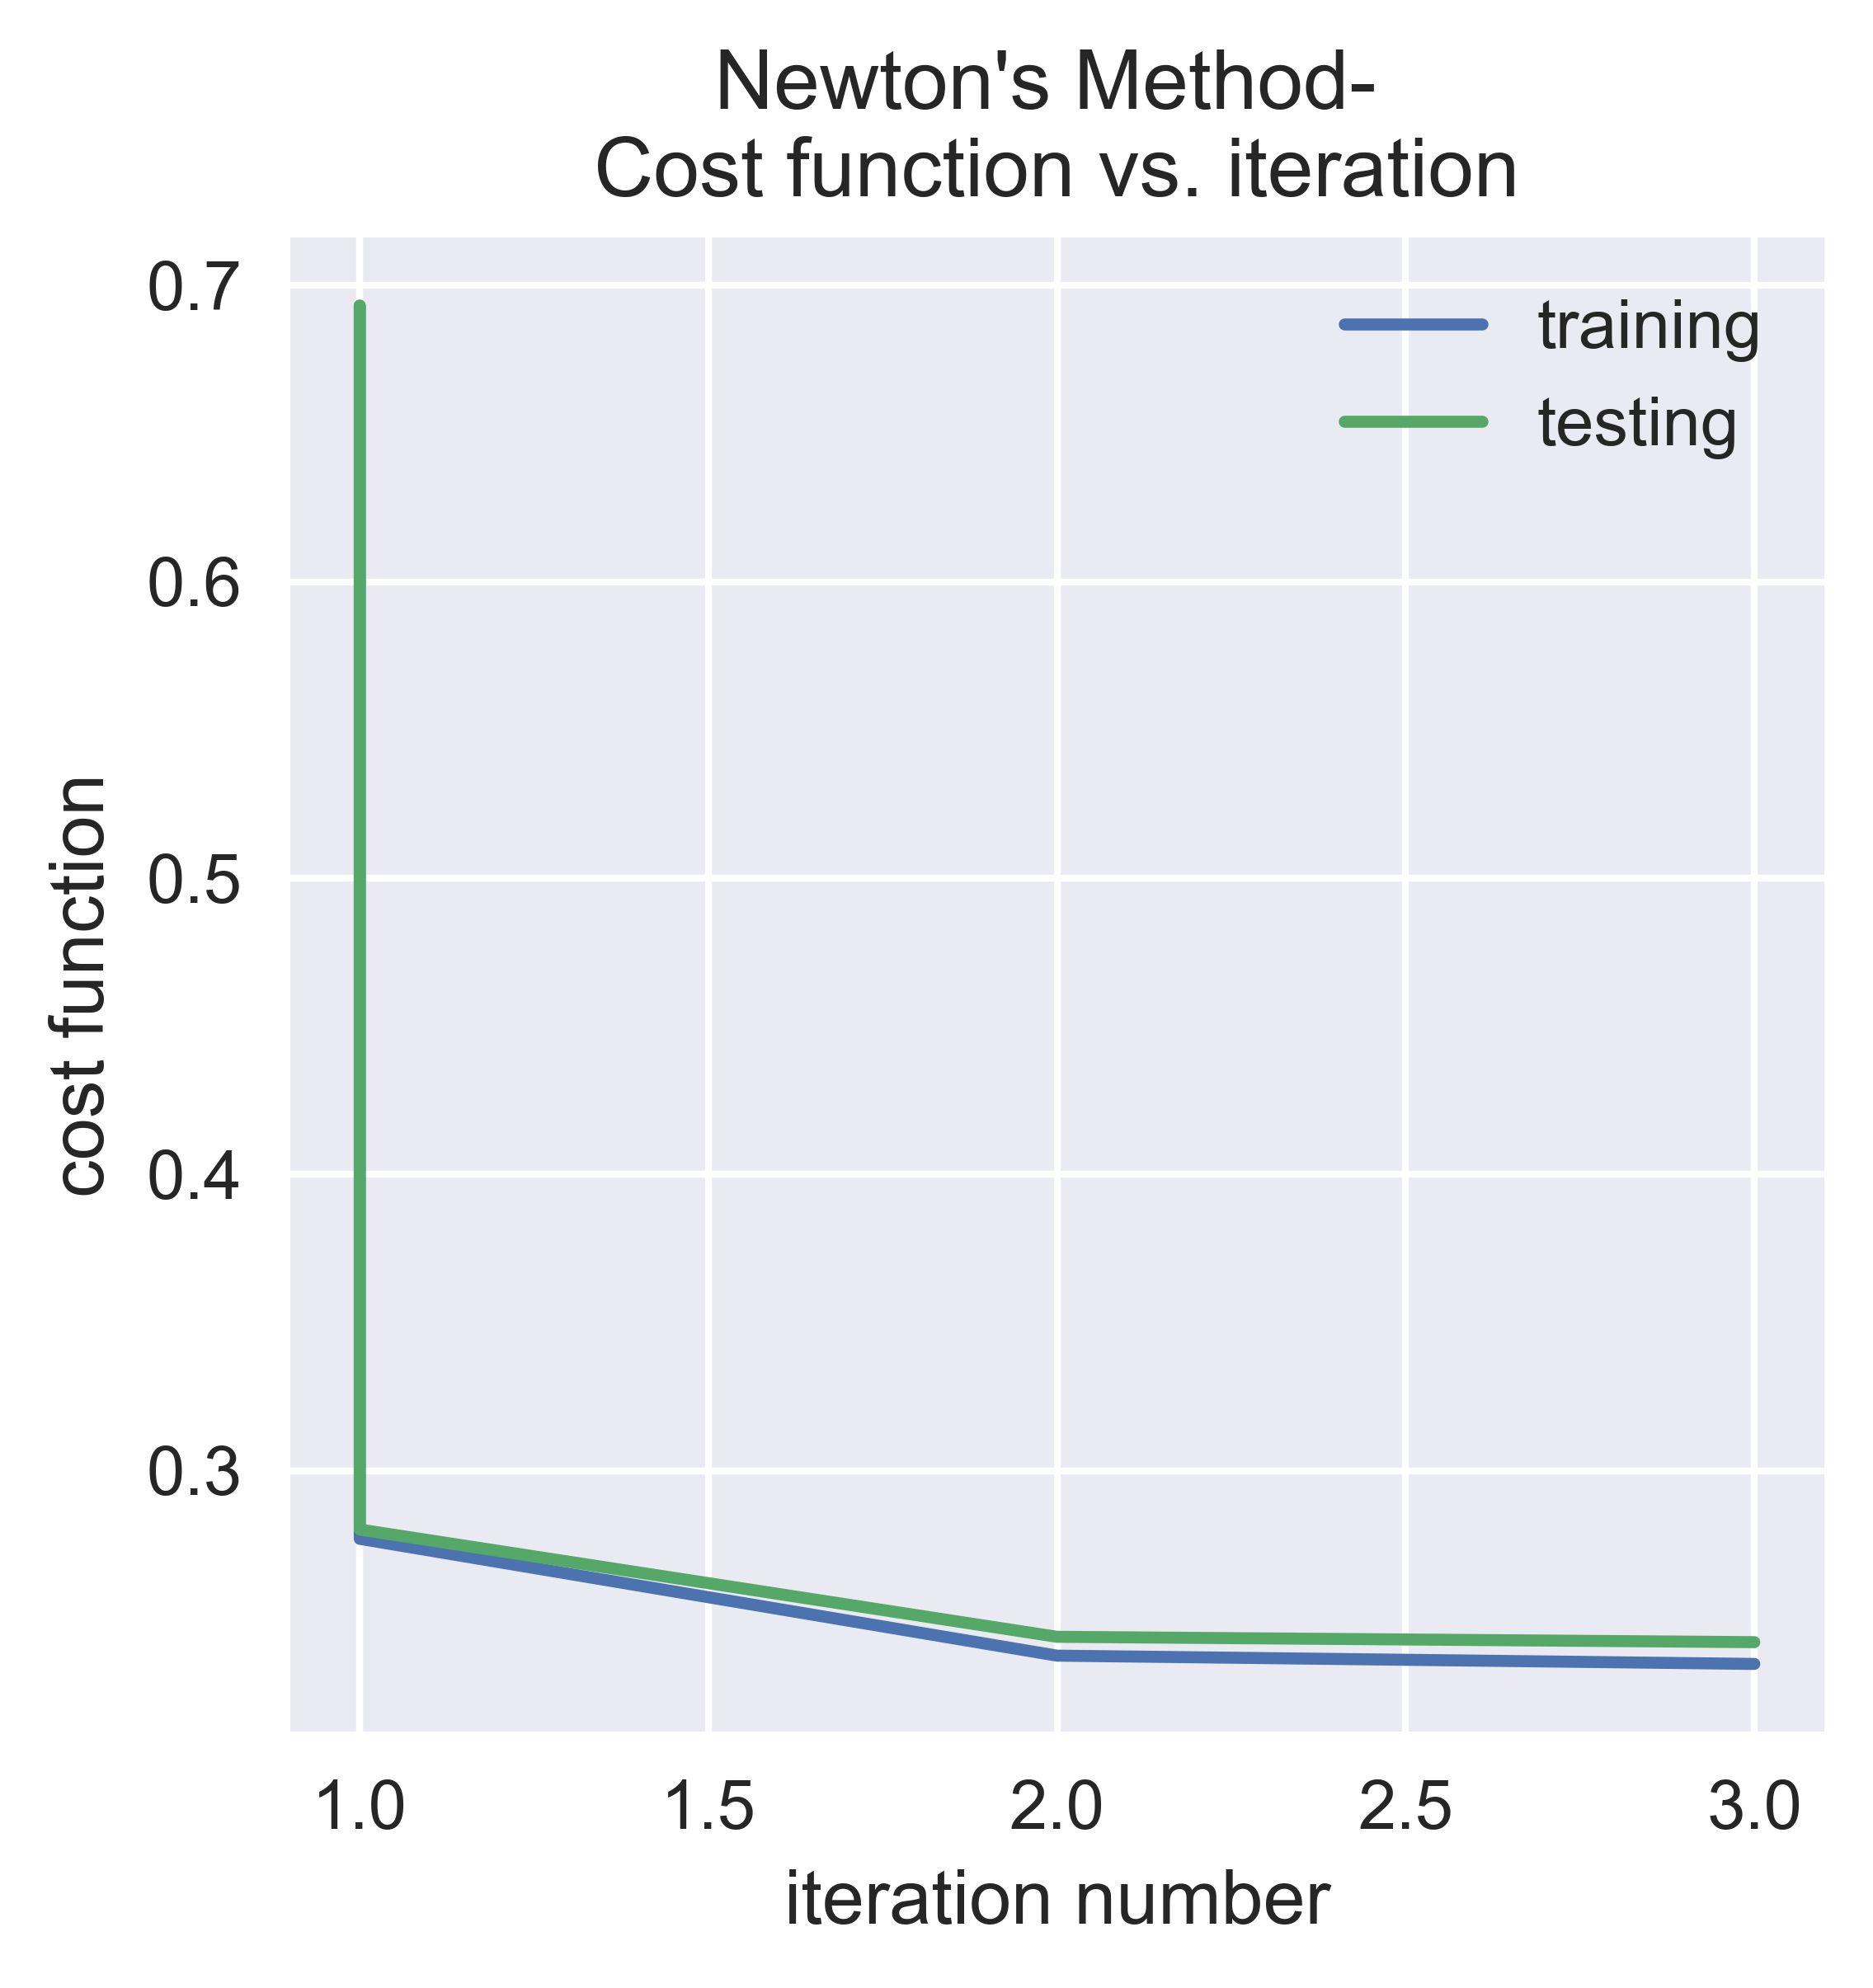

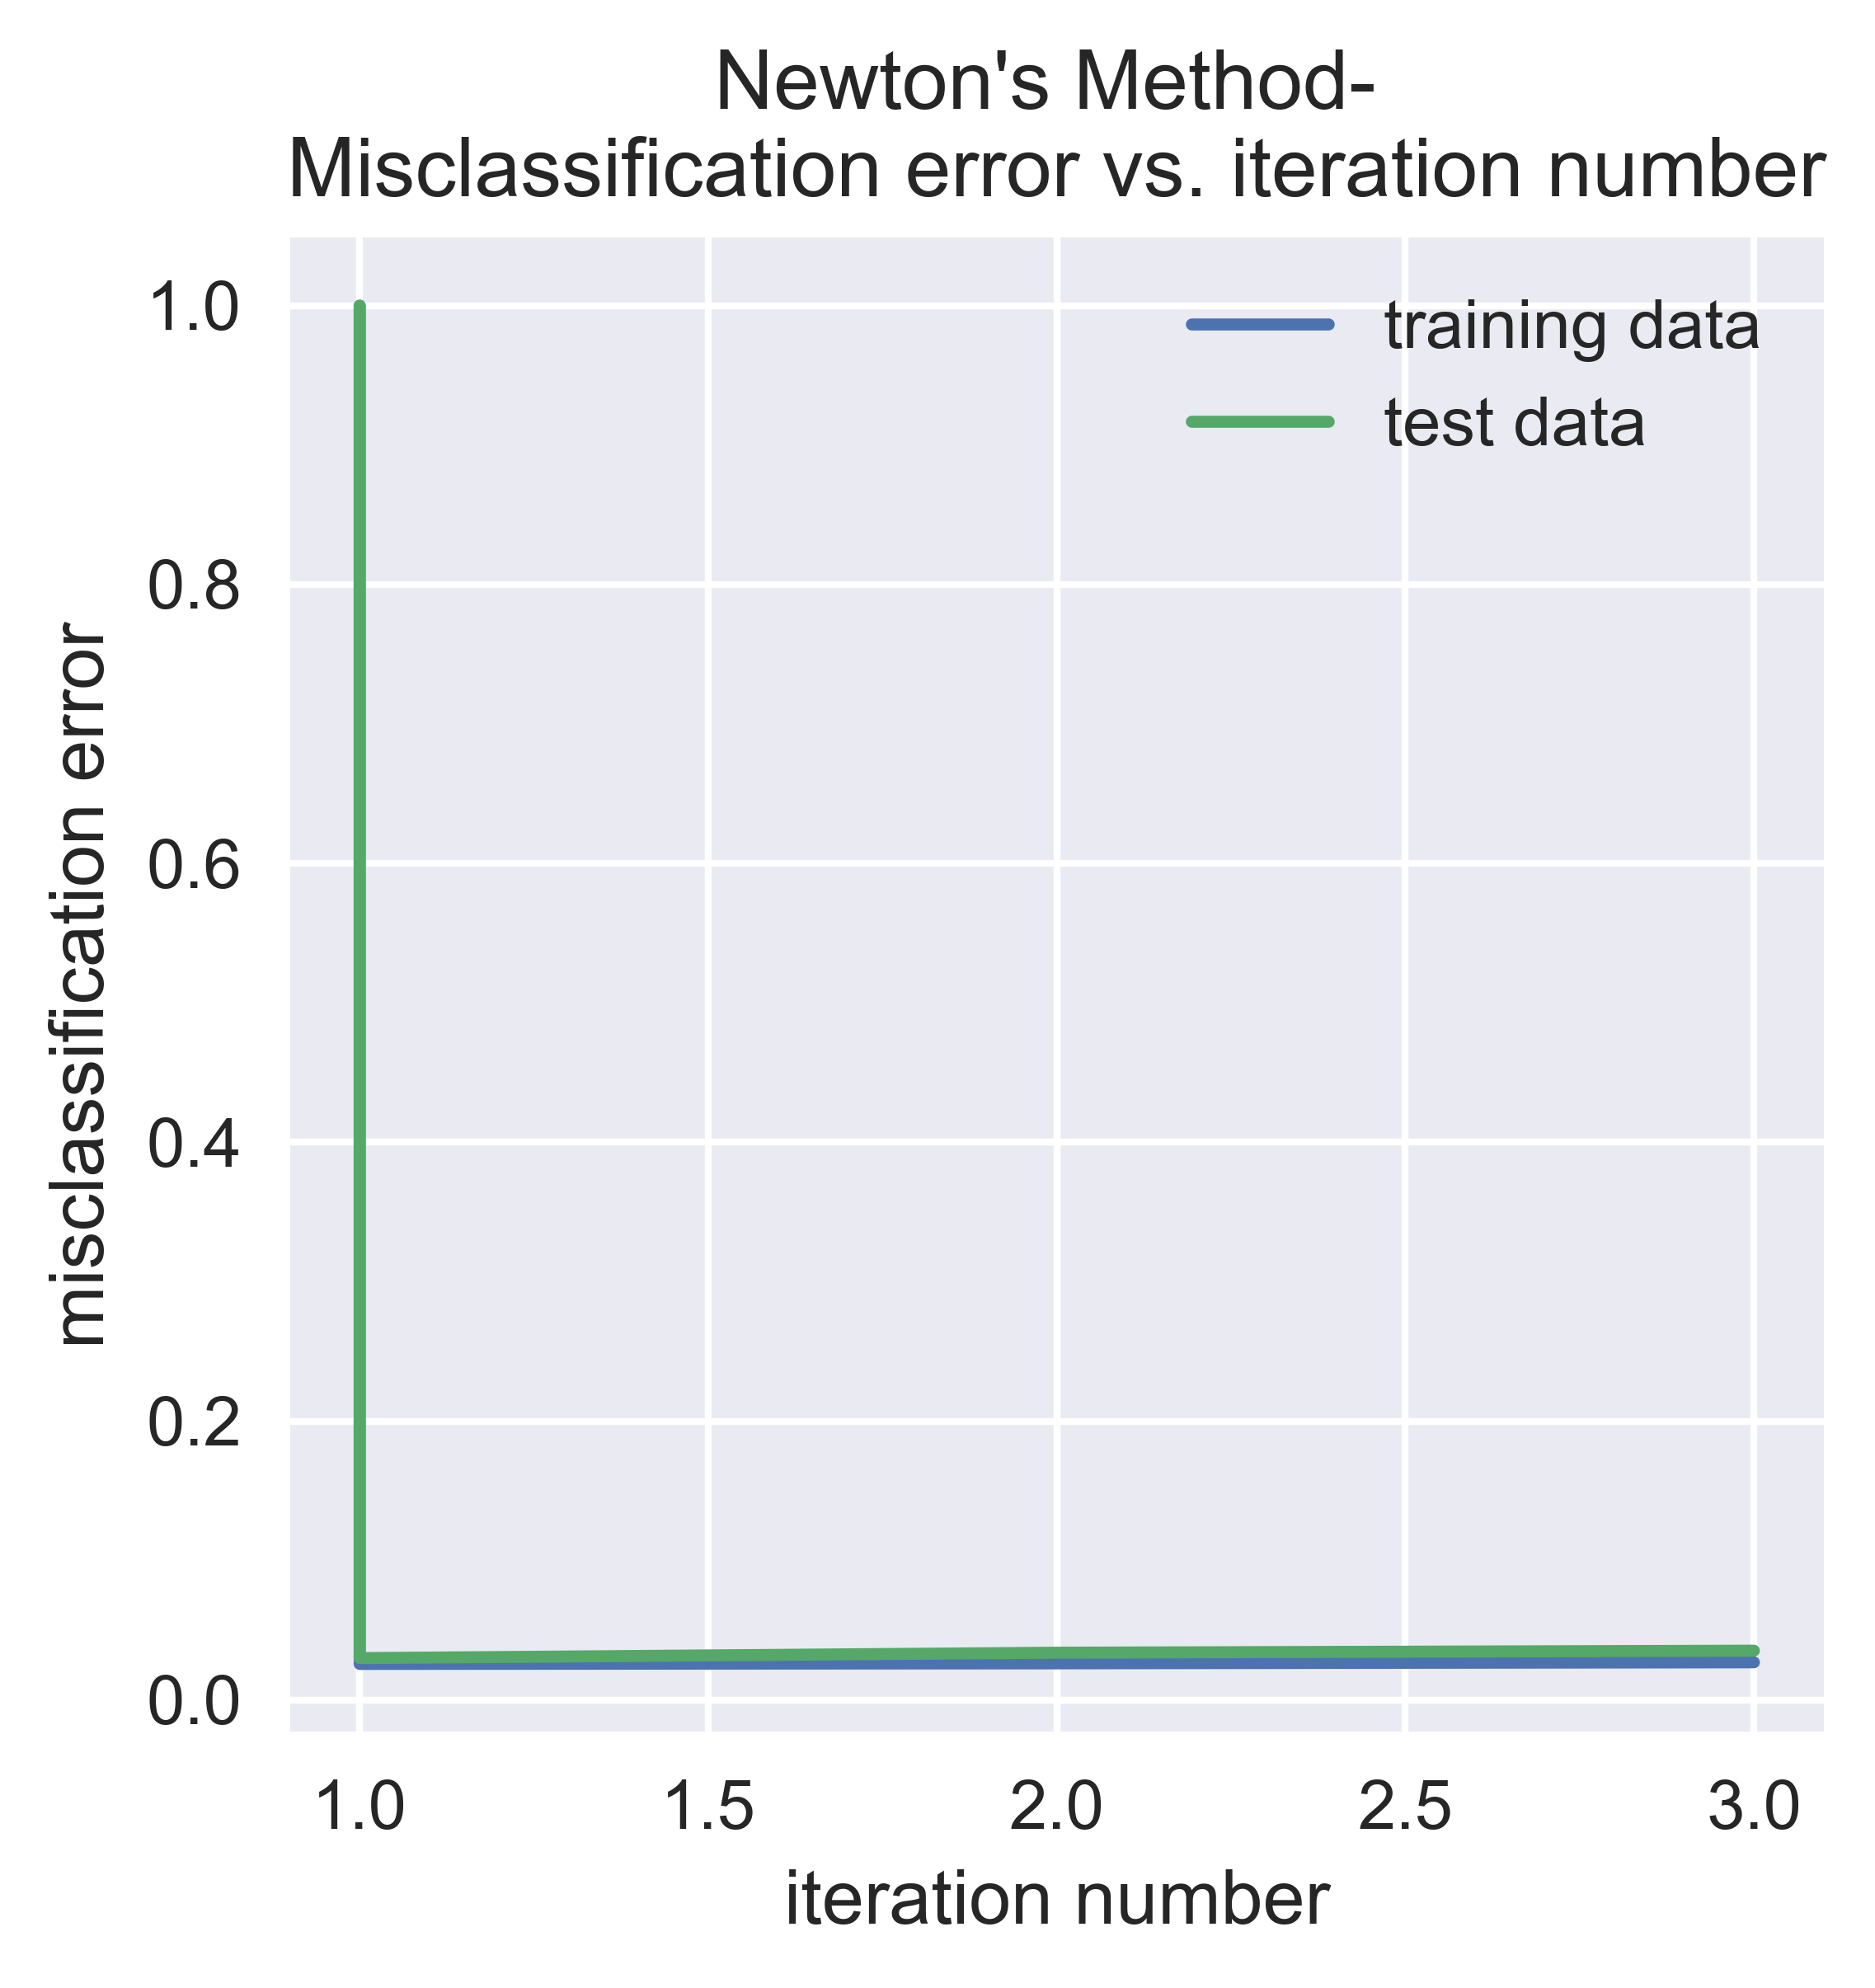

In [19]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Newton\'s Method- \n')

### batch

### this is scratch below here

In [ ]:
X = x_train_c
y = labels_train_c
X_test = x_test_c
y_test = labels_test_c

not_conv = True
j_train_vec = []
j_test_vec = []
w_vec = []
b_vec = []
k_vec = []
train_classify_vec = []
test_classify_vec = []

k = 0
#step_size = 1e-3
step_size = 5e-2
criteria_conv = 2e-4

w = np.zeros((np.shape(X)[1],))
b = 0
n = np.shape(X)[0]
#mu_vec = np.zeros((np.shape(X)[0],))
#cost_mu = np.zeros((np.shape(X)[0],))
#range_vec = np.arange(len(mu_vec))
j_prev = 0

while not_conv:
    ##### training part 
    #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
    #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
    mu_vec = 1/(1+np.exp(-y.T*(b+np.dot(X,w)))) 
    cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))
     
    #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
    #g_b = (1/n)*np.sum(mu_vec-y)
    
    g_w = (1/n)*(np.dot(X.T,(-y*(1-mu_vec)))) + 2*lambda_val*w
    g_b = (1/n)*np.sum(-y*(1-mu_vec))
    
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    ####### testing part
    
    mu_vec = 1/(1+np.exp(-y_test.T*(b+np.dot(X_test,w)))) 
    cost_mu = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))
    
    j_test = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)

    # 
    w_new = w - step_size*g_w
    b_new = b - step_size*g_b
    
    w_vec.append(w)
    b_vec.append(b)

    delta_w = np.abs(w-w_old)
    delta_b = np.abs(b-b_old)

    #w = np.array(w)
    w = copy.copy(w_new)
    b = copy.copy(b_new)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)
    
    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]
    
    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n
    
    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    # check convergence
    if ((1/n)*np.sum(delta_w))<criteria_conv and k>1:
        not_conv = False

    else:
        not_conv = True
        k += 1

    print('the value of j train is {}'.format(j_train))

    #print('the value of delta_w is {}'.format(delta_w))
    #print(mu_vec)
    #print(not_conv)


In [ ]:
plt.figure()
plt.plot(k_vec,j_train_vec,label='training')
plt.plot(k_vec,j_test_vec,label='testing')
plt.xlabel('iteration number')
plt.ylabel('cost function')
plt.title('Cost function vs. iteration')
plt.legend()
index = np.argmin(j_train_vec)
k_best = k_vec[index]
w_best = w_vec[index]


plt.figure()
plt.plot(k_vec,train_classify_vec,label='training data')
plt.plot(k_vec,test_classify_vec,label='test data')
plt.xlabel('iteration number')
plt.ylabel('misclassification error')
plt.title('Misclassification error vs. iteration number')
plt.legend()


In [ ]:
np.diag([1,2,3])

In [37]:
a= [1,2,3,4,5]

In [44]:
a[:-2]

[1, 2, 3]

In [68]:
?np.random.choice

In [89]:
a = [1,2,3,4,5,6,7]
i = 1
batch_size = 4

In [90]:
a[i:i+batch_size]

[2, 3, 4, 5]